# Acceptance of the most profitable oil production region

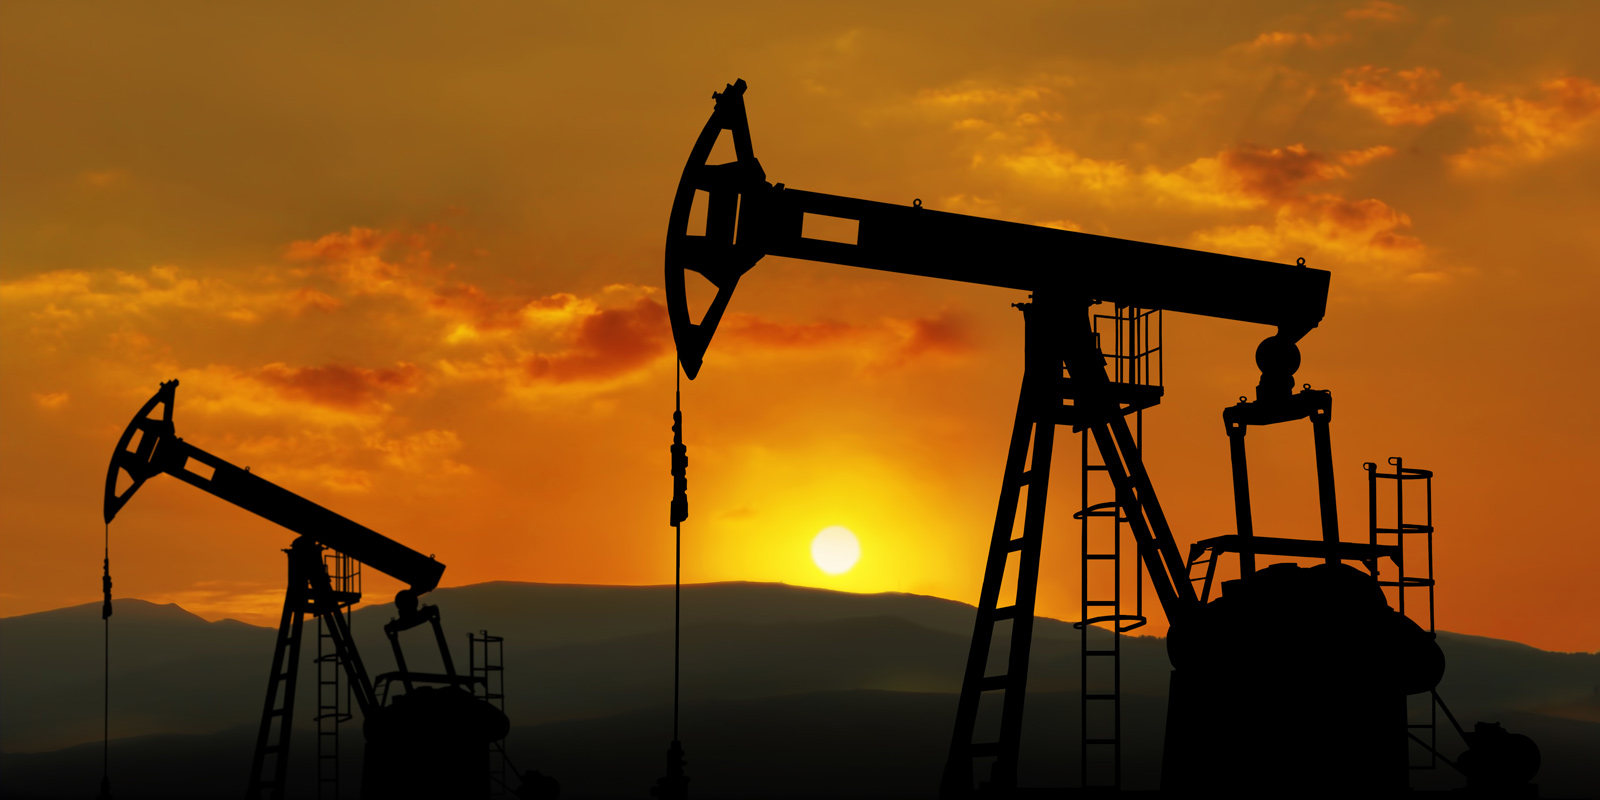

Oil company G is looking for a location for a new oil well.

There are oil samples in three regions: in each 10,000 deposits, where the quality of oil and the volume of its reserves were measured. It is necessary to choose the deposit with the highest volume of reserves. The number of fields depends on the company's budget and the cost of developing one well.

**Survey target** 

To build a machine learning model that will help determine the region where mining will bring the greatest profit.

**Research progress**

 1. Data review
 2. Data preprocessing
 3. Train and validate the model
 4. Calculation of profit and loss hazard


## Data review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy import stats as st
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from numpy import math

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
geo_data_1 = pd.read_csv(r'C:\Users\Vadim\Documents\Datasets\geo_data_0.csv')  # данные геологоразведки 1 региона
geo_data_2 = pd.read_csv(r'C:\Users\Vadim\Documents\Datasets\geo_data_1.csv')  # данные геологоразведки 2 региона
geo_data_3 = pd.read_csv(r'C:\Users\Vadim\Documents\Datasets\geo_data_2.csv')  # данные геологоразведки 3 региона

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


False    100000
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


False    100000
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


False    100000
dtype: int64

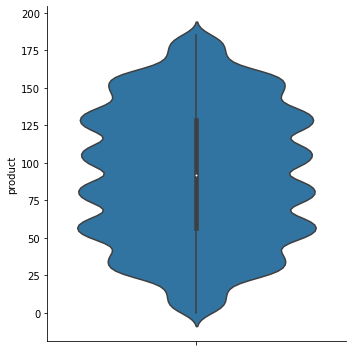

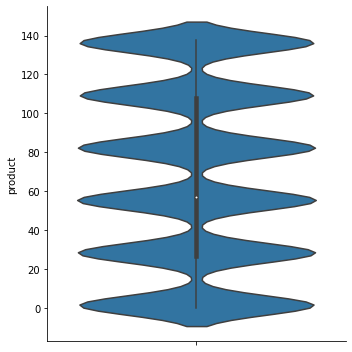

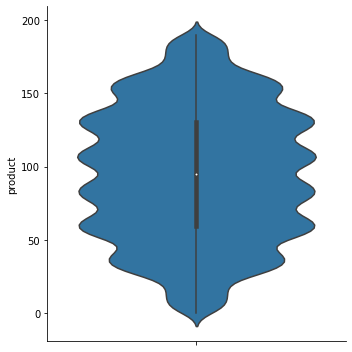

In [3]:
list_ = [geo_data_1, geo_data_2, geo_data_3]
for i in list_:
    display(i.info())
    display(i.head(5))
    display(i.describe())
    display(i.duplicated().value_counts())
    display(_=sns.catplot(y='product', kind="violin", data=i, orient='v')) 
    print("=========================================================")

In [4]:
geo_data_1['id'].duplicated().sum()  # duplicates in id column

10

In [5]:
geo_data_1[geo_data_1['id'] == 'A5aEY']  

,id,f0,f1,f2,product
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


**Conclusions**

Tables contain such data types as float64 and object. There are no gaps in the data, but there are duplicates. Duplicates occur in the id column. The id column contains the names of the wells. Apparently, these duplicates are erroneously named wells whose names coincided.


## Data preprocessing

In [6]:
geo_data_1 = geo_data_1.drop_duplicates(subset='id') # remove lines containing duplicates
geo_data_1 = geo_data_1.dropna()

geo_data_2 = geo_data_2.drop_duplicates(subset='id')
geo_data_2 = geo_data_2.dropna()

geo_data_3 = geo_data_3.drop_duplicates(subset='id')
geo_data_3 = geo_data_3.dropna()


In [7]:
geo_data_1.info()
geo_data_2.info()
geo_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
--

**Conclusions:**

Data cleared. Next, you can proceed to preparing the data for loading into the model.

## Train and validate the model

### Preparing data for train and test sets

For model predictions, the id column does not carry useful information, therefore, you can get rid of it:

In [8]:
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)
geo_data_3 = geo_data_3.drop(['id'], axis=1)

In [10]:
features_1 = geo_data_1.drop(['product'], axis=1)  # extract features (1 region)
target_1 = geo_data_1['product']  # extract the target feature (1 region)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)  # division of data into training and test samples (1 region)
#-------------------------------------------------------------------------------------------
features_2 = geo_data_2.drop(['product'], axis=1)  # extract features (region 2)
target_2 = geo_data_2['product']  # extract the target feature (region 2)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)  # division of data into training and test samples (region 2) 
#-------------------------------------------------------------------------------------------
features_3 = geo_data_3.drop(['product'], axis=1)  # extract features (region 3)
target_3 = geo_data_3['product']  # extract the target feature (region 3)

features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(
    features_3, target_3, test_size=0.25, random_state=12345)  # division of data into training and test samples (region 3)

### Feature scaling

In [11]:
numeric = ['f0', 'f1', 'f2']  # list of columns with scalable features

scaler = StandardScaler()  # object of the StandardScaler structure for subsequent tuning on the training data
# feature scaling (1 region)
features_train_1.loc[:, numeric] = scaler.fit_transform(features_train_1.loc[:, numeric]) 
features_valid_1.loc[:, numeric] = scaler.transform(features_valid_1.loc[:, numeric]) 
# feature scaling (2 region )
features_train_2.loc[:, numeric] = scaler.fit_transform(features_train_2.loc[:, numeric])
features_valid_2.loc[:, numeric] = scaler.transform(features_valid_2.loc[:, numeric])
# feature scaling (3 region )
features_train_3.loc[:, numeric] = scaler.fit_transform(features_train_3.loc[:, numeric])
features_valid_3.loc[:, numeric] = scaler.transform(features_valid_3.loc[:, numeric])

pd.options.mode.chained_assignment = None

### Model Training

In [12]:
def model_LR(features_train, target_train, features_valid, target_valid, n):
    model = LinearRegression()
    model.fit(features_train, target_train)  # training the model on the training set
    predicted_valid = model.predict(features_valid)  # validation set prediction
    mse = mean_squared_error(target_valid, predicted_valid)
    rmse = mse**0.5
    return print('Mean square error (', n, 'region):', rmse)

In [13]:
model_LR(features_train_1, target_train_1, features_valid_1, target_valid_1, 1)
model_LR(features_train_2, target_train_2, features_valid_2, target_valid_2, 2)
model_LR(features_train_3, target_train_3, features_valid_3, target_valid_3, 3)

Mean square error ( 1 region): 37.853527328872964
Mean square error ( 2 region): 0.8920592647717033
Mean square error ( 3 region): 40.07585073246016


- Mean square error ( 1 region): 37.853527328872964
- Mean square error ( 2 region): 0.8920592647717033
- Mean square error ( 3 region): 40.07585073246016

Checking the model for sanity:

In [14]:
def random_model_LR(target_valid, n):
    random_predictions = pd.Series(target_valid.mean(), index=target_valid.index)
    random_mse = mean_squared_error(target_valid, random_predictions)
    random_rmse = random_mse**0.5
    return print('Root mean square error of a random model (', n, 'region):', random_rmse)

In [15]:
random_model_LR(target_valid_1, 1)
random_model_LR(target_valid_2, 2)
random_model_LR(target_valid_3, 3)

Root mean square error of a random model ( 1 region): 44.376978128447675
Root mean square error of a random model ( 2 region): 45.900724096155486
Root mean square error of a random model ( 3 region): 44.68240847149314


- Root mean square error of a random model ( 1 region): 44.376978128447675
- Root mean square error of a random model ( 2 region): 45.900724096155486
- Root mean square error of a random model ( 3 region): 44.68240847149314

**Conclusions:**

The root mean square error of all three models is less than the errors of random such models. Predictions can be considered successful.

## Calculation of the average stock of raw materials in the region

In [16]:
def model_LR(features_train, target_train, features_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)  
    predicted_valid = model.predict(features_valid)
    return predicted_valid

In [17]:
predicted_valid_1 = model_LR(features_train_1, target_train_1, features_valid_1)
predicted_valid_2 = model_LR(features_train_2, target_train_2, features_valid_2)
predicted_valid_3 = model_LR(features_train_3, target_train_3, features_valid_3)
mean_prod_1 = predicted_valid_1.mean()
mean_prod_2 = predicted_valid_2.mean()
mean_prod_3 = predicted_valid_3.mean()
print('Average stock of predicted raw materials (1 region):', mean_prod_1)
print('Average stock of predicted raw materials (2 region):', mean_prod_2)
print('Average stock of predicted raw materials (3 region):', mean_prod_3)

Average stock of predicted raw materials (1 region): 92.78915638280621
Average stock of predicted raw materials (2 region): 69.1783195703043
Average stock of predicted raw materials (3 region): 94.86572480562035


**Average amount of raw materials in a well for each region:**
- Average stock of predicted raw materials (1 region): 92.78915638280621
- Average stock of predicted raw materials (2 region): 69.1783195703043
- Average stock of predicted raw materials (3 region): 94.86572480562035

**Conclusions:**

In the 2nd region, the minimum amount of raw materials. 1st and 3rd are almost the same. In the 3rd region, the maximum

## Calculation of profit and loss hazard

In [32]:
BUDGET = 10**10  # USD well development budget
BARREL = 450  # USD revenue per barrel
N_WELL = 200  # number of developed wells
BUDGET_PER_WELL = BUDGET / N_WELL  # expencese per well
MIN_BARRELS_PER_WELL = BUDGET_PER_WELL / (BARREL*1000)  # volume of raw materials for break-even development of a new well
# in thousand barrels
print('The minimum required number of barrels per well:', round(MIN_BARRELS_PER_WELL, 3), 'thousand barrels')

The minimum required number of barrels per well: 111.111 thousand barrels


*111 thousand barrels are needed to pay off one well, which is slightly more than the predicted average stock of raw materials in a well in each of the 3 regions.*

**Function for calculating profit from 200 wells:**

In [23]:
def well_profit(BARREL, subsample_predicted_valid_1, target_valid_1):
    predicted_valid_1_n200 = subsample_predicted_valid_1.nlargest(200)  # selection of the top 200 predictions
    target_subsample = target_valid_1[predicted_valid_1_n200.index]  # selection of target characteristic values
    
# according to the sample indices of the top 200 model predictions

    return BARREL*1000*target_subsample.sum() - BUDGET # multiply by 1000 k in target_subsample
# the volume of raw materials is given in thousand barrels

In [24]:
def statistic(target_valid, predicted_valid, BARREL):
    target_valid = target_valid.reset_index(drop=True)
    state = np.random.RandomState(12345)

    values = []

    for i in range(1000):  # bootstrap for 1000 subsamples
        subsample_predicted_valid = pd.Series(predicted_valid).sample(n=500, replace=False, random_state=state)   
        values.append(well_profit(BARREL, subsample_predicted_valid, target_valid))

    values = pd.Series(values)
    values_neg = values[values < 0]
        
    lower = values.quantile(0.025).round()
    upper = values.quantile(0.975).round()

    loss_hazard = '{:.2%}'.format(values_neg.count() / values.count())  # loss hazard


    df_statistics = pd.DataFrame(   # 95%-й confidence interval of volumes of raw materials in the region
        [{ '95%-й confidence interval': [lower, upper], 'Average profit for 200 best wells': values.mean(), 'loss hazard': loss_hazard },
        ])
    df_statistics = df_statistics.transpose().style.set_properties(**{'text-align': 'center'})
    display(df_statistics)

    plt.xlabel('Profit values', fontsize=12) # histogram of frequencies of distribution 
    plt.ylabel('Value frequency', fontsize=12) # of volumes of raw materials for 1000 subsamples
    values.hist().set_title('Profit distribution histogram for \n bootstrap (1000 subsamples)', fontsize=14);

### Key metrics for the 1st region

,0
95%-й confidence interval,"[-113097032.0, 930676532.0]"
Average profit for 200 best wells,405834113.060329
loss hazard,6.60%


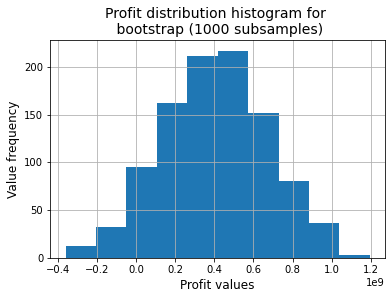

In [25]:
statistic(target_valid_1, predicted_valid_1, BARREL) 

### Key metrics for the 2nd region

,0
95%-й confidence interval,"[94561756.0, 896586620.0]"
Average profit for 200 best wells,476062069.491400
loss hazard,0.50%


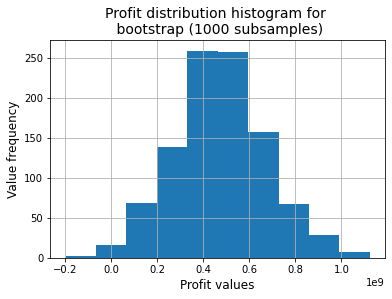

In [26]:
statistic(target_valid_2, predicted_valid_2, BARREL)

### Key metrics for the 3rd region

,0
95%-й confidence interval,"[-185261881.0, 868235358.0]"
Average profit for 200 best wells,337622065.049881
loss hazard,10.30%


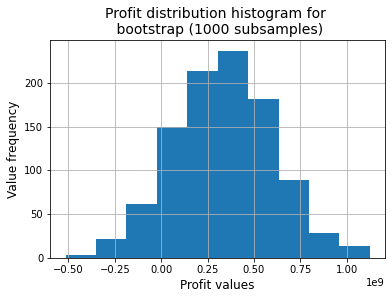

In [27]:
statistic(target_valid_3, predicted_valid_3, BARREL)

**Conclusion: The 2nd region proved to be the best among the three regions**
- This region has the lowest risk of loss: 0.50%, which is 13 times lower than the 1st region and 20 times lower than the 3rd.
- The average profit for 200 wells was 478 million dollars, which is 71 million more than in 1 and 139 million more than in the 3rd.
- 95% confidence interval is in the range from 94 million to 896 million [94561756.0, 896586620.0], i.e. the probability that the average profit will be in this range is 95%.